In [1]:
import cv2
from asociation import LabelORCR
import matplotlib.pyplot as plt


In [2]:
fields = ['part n', 'cantidad', 'proveedor', 'descripcion', 
            'lote q', 'serie(s)', 'ref. pdl', 'op:', 'fecha']

labelocr = LabelORCR(fields)

[2024/10/03 23:01:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\abeld/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\abeld/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [3]:
path = 'images/pladomin.jpg'
img = cv2.imread(path)

In [4]:
# Procesar el frame
labelocr.inferenciar_imagen(img)

[2024/10/03 23:01:48] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/03 23:01:48] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.20599937438964844
[2024/10/03 23:01:49] ppocr DEBUG: rec_res num  : 21, elapsed : 0.5685083866119385
[[[[797.0, 367.0], [979.0, 378.0], [977.0, 406.0], [795.0, 395.0]], ('GRUPOANTOLIN', 0.9938254356384277)], [[[563.0, 388.0], [665.0, 396.0], [663.0, 422.0], [561.0, 414.0]], ('part ne (P)', 0.8278599381446838)], [[[840.0, 400.0], [963.0, 412.0], [960.0, 440.0], [837.0, 428.0]], ('cantidad (Q', 0.958605170249939)], [[[1049.0, 416.0], [1181.0, 425.0], [1179.0, 447.0], [1047.0, 438.0]], ('proveedor (V)', 0.9360689520835876)], [[[569.0, 474.0], [707.0, 483.0], [705.0, 511.0], [567.0, 502.0]], ('156987572', 0.9979802370071411)], [[[844.0, 494.0], [876.0, 494.0], [876.0, 518.0], [844.0, 518.0]], ('50', 0.9973886013031006)], [[[1046.0, 498.0], [1127.0, 505.0], [1124.0, 535.0], [1043.0, 527.0]], ('201

[]

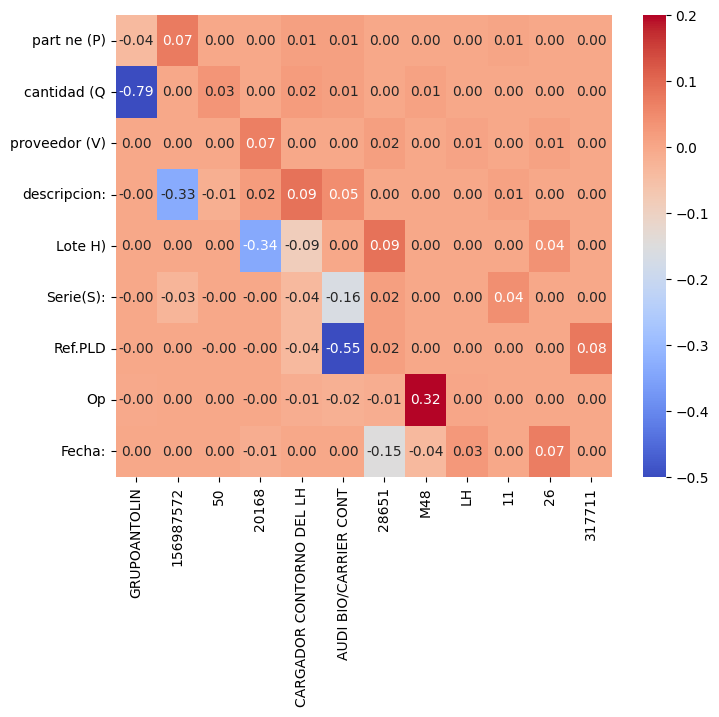

In [8]:
# Asociacion campo-valor:
fig, ax, heatmap = labelocr.plotear_matriz()
plt.plot()

In [6]:
# representacion de inferencia:
img_det = labelocr.dibujar_inferencia()
#bgr2rgb:
img_det[:,:, [0,1,2]] = img_det[:,:, [2,1,0]]

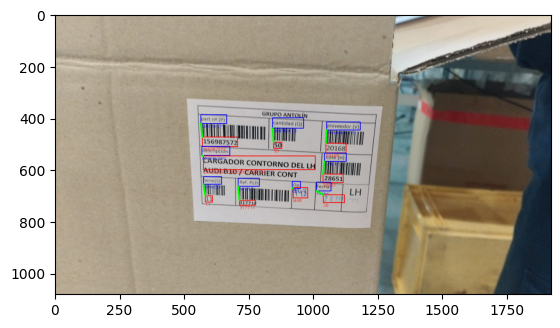

In [7]:
plt.imshow(img_det)
plt.show()